In [1]:
from functions import Knapsack,KnapsackNewApproach,new_eq_optimal_knapsack,get_figure_knapsack,eval_constrains_knapsack
from functions import mapping_cost
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CplexOptimizer, MinimumEigenOptimizer
from qiskit.algorithms.optimizers import COBYLA
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer
backend = Aer.get_backend("qasm_simulator")

In [2]:
cases = 10
solutions_new = {}
optimal_new = []
ratio_new = []; new =[]
result_classical = []; result_qaoa_new = []

np.random.seed(15)
num_items = 4 # number of items
max_weight = 15 # max weight of a bin
values = np.random.randint(1, max_weight, num_items) # Randomly picking the item weight
weights = []#np.random.randint(1, max_weight, num_items) # Randomly picking the item weight
qaoa = MinimumEigenOptimizer(QAOA(optimizer=COBYLA(maxiter=100), reps=4, quantum_instance=backend))

for i in range(cases): # Testing 5 different randomly selected configurations of the problem
    print(f"----------- Case {i+1} -------------")
    weights.append(np.random.randint(1, max_weight, num_items)) # Randomly picking the item weight

    qubo_classical, qp = Knapsack(values, weights[i], max_weight)
    qubo_new = KnapsackNewApproach(values, weights[i], max_weight, alpha=1)
    result_classical.append(CplexOptimizer().solve(qubo_classical))
    optimal_new.append(new_eq_optimal_knapsack(qubo_new, qubo_classical))
    result_qaoa_new.append(CplexOptimizer().solve(qubo_new))
    solutions_new = result_qaoa_new[-1].fval
    check_const = eval_constrains_knapsack(qp, result_qaoa_new[-1])
    print(check_const)

----------- Case 1 -------------
[14.]
----------- Case 2 -------------
[14.]
----------- Case 3 -------------
[14.]
----------- Case 4 -------------
[16.]
----------- Case 5 -------------
[14.]
----------- Case 6 -------------
[14.]
----------- Case 7 -------------
[14.]
----------- Case 8 -------------
[15.]
----------- Case 9 -------------
[14.]
----------- Case 10 -------------
[13.]


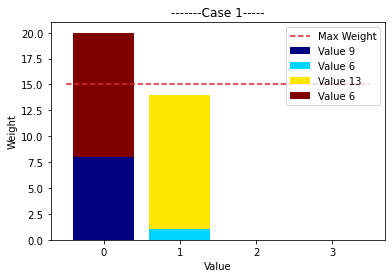

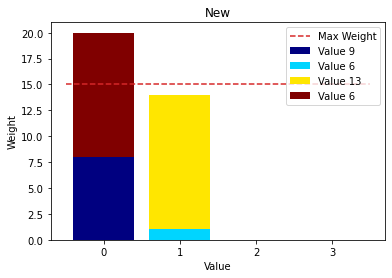

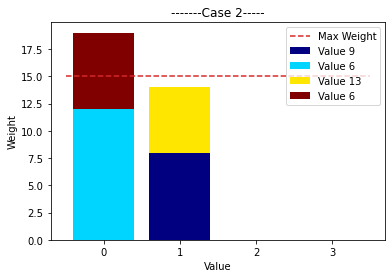

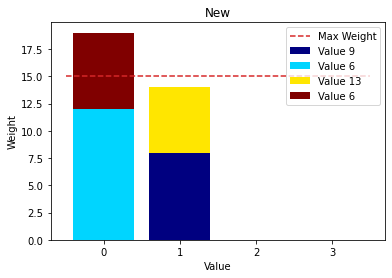

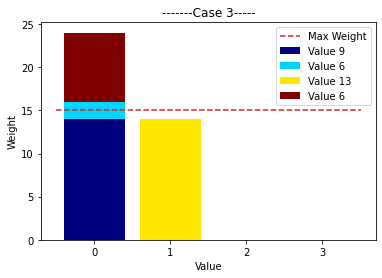

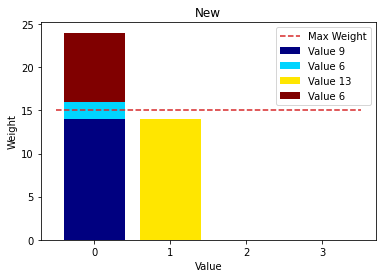

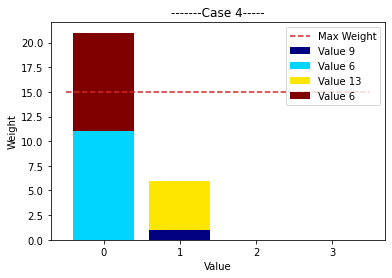

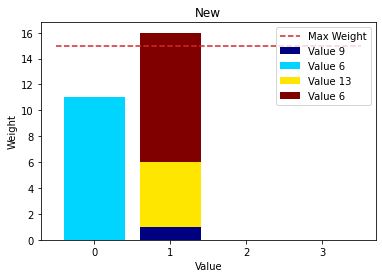

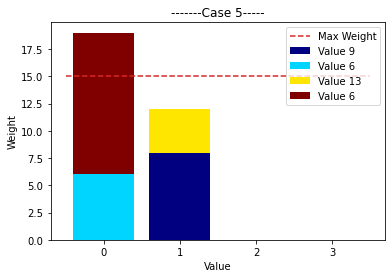

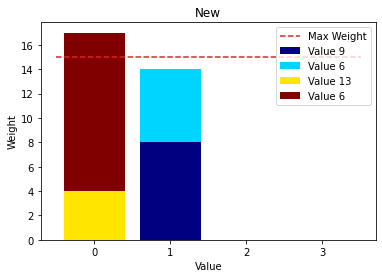

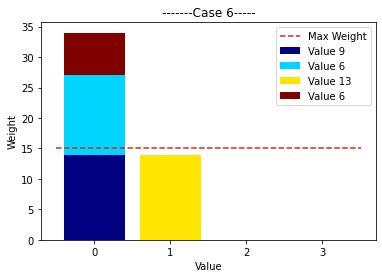

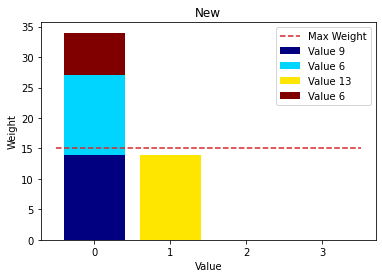

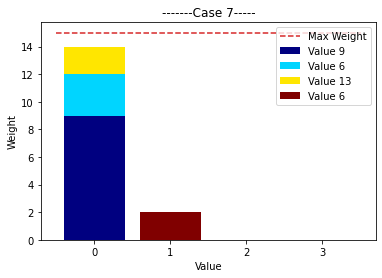

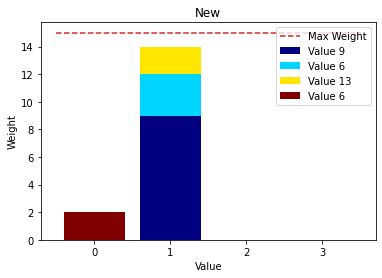

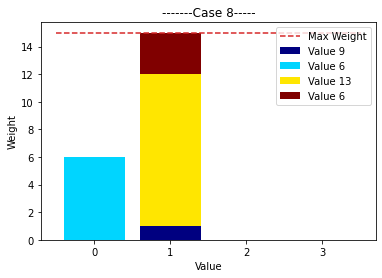

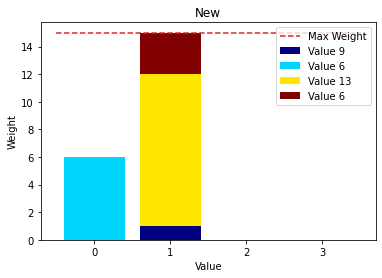

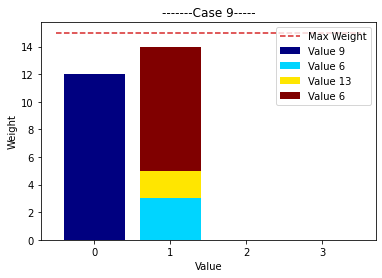

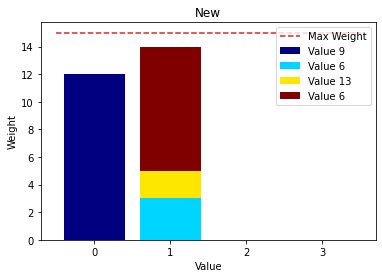

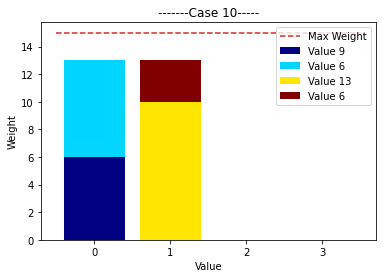

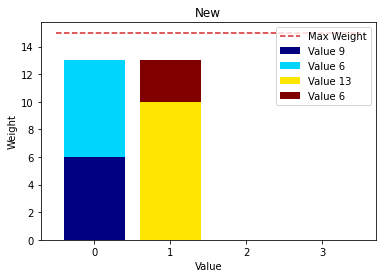

In [3]:
for i in range(len(result_classical)):
    fig = get_figure_knapsack(result_classical[i].x,values, weights[i], max_weight, title=f"-------Case {i+1}-----")
    fig = get_figure_knapsack(result_qaoa_new[i].x,values, weights[i], max_weight, title="New")

In [4]:
n = 20
alpha = np.linspace(0, 2*np.pi, n)
beta = np.linspace(0, np.pi, n)
map_cost = mapping_cost(alpha, beta, qubo_new)


Text(0, 0.5, '$\\alpha$')

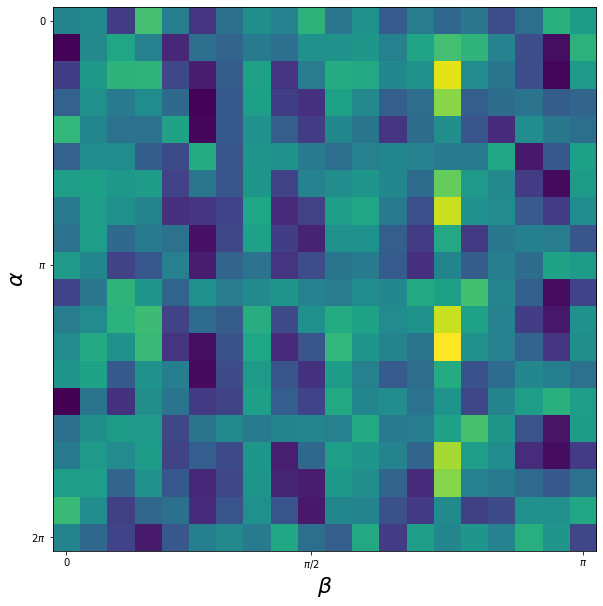

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(map_cost)
plt.xticks([0,9,19], ["0", r"$\pi/2$", r"$\pi$"])
plt.yticks([0,9,19], ["0", r"$\pi$", r"2$\pi$"])
plt.xlabel(r"$\beta$", fontsize=22)
plt.ylabel(r"$\alpha$", fontsize=22)
